<a href="https://colab.research.google.com/github/promihamid/MachineLearningPrac/blob/main/Day2.4_FeatureScaling_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1><font color='red'>Feature Scaling<br><h6><font color='black'>It's like making sure everyone in a race starts from the same line. In machine learning, “features” are your dataset’s columns. If one column has big numbers (like salary) and another has small numbers (like age), the bigger one can unfairly influence the model. So, we "scale" them to bring everything to the same level.**

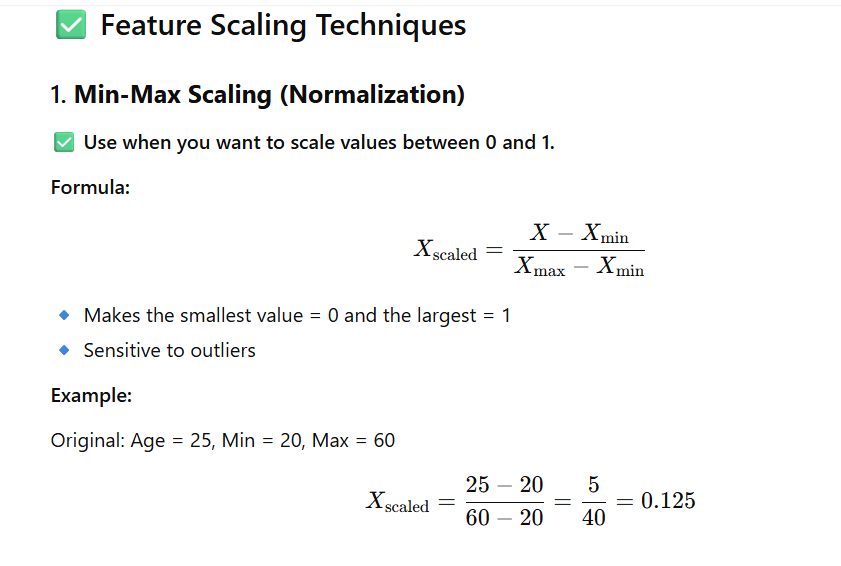

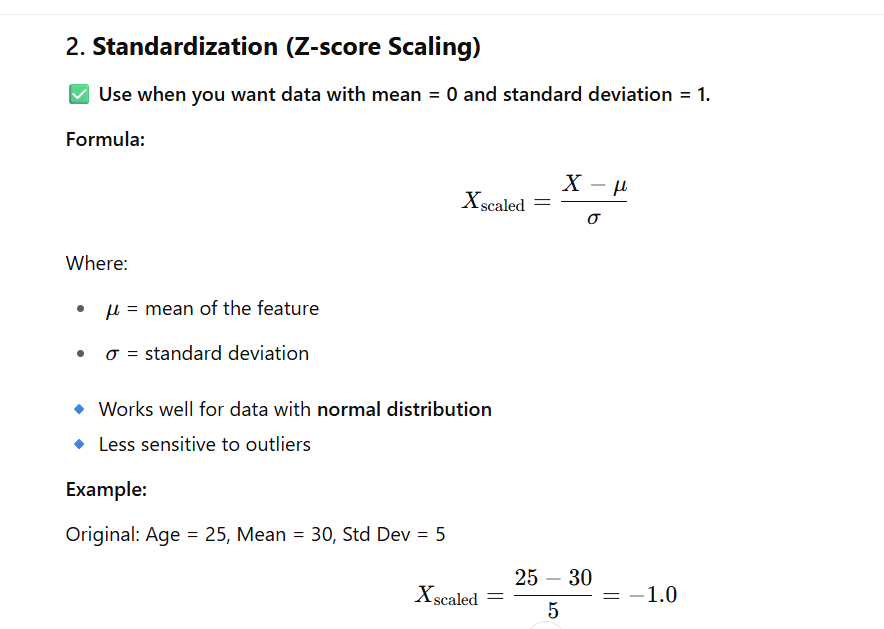

<h3><b><font color='red'>Standardization

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/loan.csv')

In [3]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


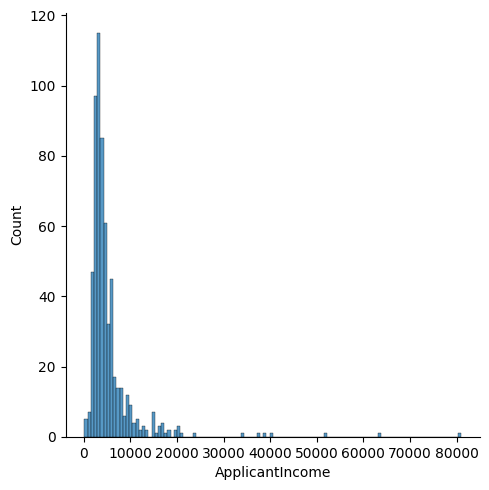

In [5]:
sns.displot(dataset['ApplicantIncome'])
plt.show()

In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()
ss.fit(dataset[['ApplicantIncome']])

StandardScaler()

In [12]:
dataset['ApplicantIncome_ss'] = pd.DataFrame(ss.transform(dataset[['ApplicantIncome']]),columns=['x'])

<b>

1.   This line scales the ApplicantIncome column using standardization (Z-score scaling).

2.   It uses a StandardScaler object (ss) to transform the data.

3.   pd.DataFrame(..., columns=['x']) temporarily names the scaled column as 'x'.

4.   The scaled values are then stored in a new column called 'ApplicantIncome_ss' in the original dataset.The 'x' column name is not saved — only the values are used.





In [13]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


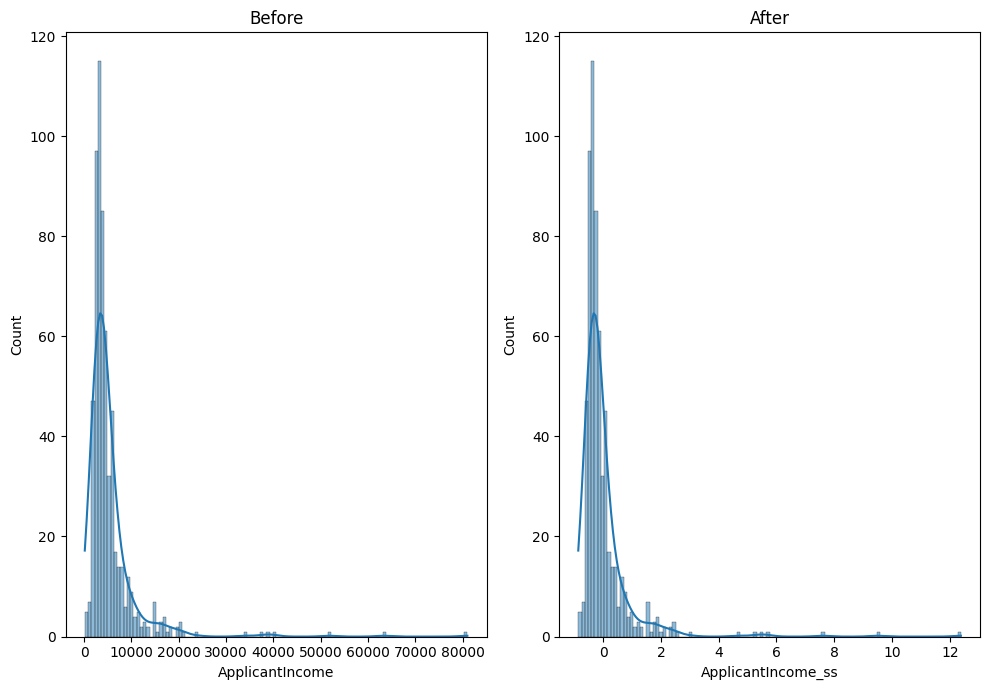

In [19]:
plt.figure(figsize=(10, 7))

# First subplot (Before scaling)
plt.subplot(1, 2, 1)
plt.title('Before')
sns.histplot(dataset['ApplicantIncome'], kde=True)  # Use histplot instead of displot

# Second subplot (After scaling)
plt.subplot(1, 2, 2)
plt.title('After')
sns.histplot(dataset['ApplicantIncome_ss'], kde=True)

plt.tight_layout()
plt.show()

**kde=True` adds a smooth curve (Kernel Density Estimate) to the histogram to show the data's distribution shape.**